# <center>👨🏻‍💻 | Getting Started with Computer Vision </center>

This is my **first** time working on a  **computer vision** project and developing a **neural network**!<br><br>
In order to start with computer vision, I'm using Kaggle's <a href="https://www.kaggle.com/competitions/digit-recognizer/overview/description">Digit Recognizer</a> competition to put on practice the knowledge I've acquired after studying the principles of computer vision and deep learning.<br><br>
The MNIST ("Modified National Institute of Standards and Technology") is the **de facto “hello world” dataset of computer vision**. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.<br><br>
The **goal of this competition is to take images of handwritten digits and create a machine learning model that can correctly identify what digit is in the image**. The metrics used to evaluate how well the model performs is the accuracy of predicitions, that is the percentage of images that our model can label correctly.<br><br>

# Why Convolutional Neural Network?
According to <a href = "https://www.ibm.com/cloud/learn/convolutional-neural-networks">this IBM article</a>, convolutional neural networks are distinguished from other neural networks by their **superior performance with image, speech and audio inputs**, which makes it ideal for a getting started project working with image classification. 

<h1 style = "border-bottom: 3px solid black; padding: 8px"><b>1 | Importing Libraries</b></h1>

In [31]:
import numpy as np,pandas as pd, plotly.express as plt, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<h1 style = "border-bottom: 3px solid black; padding: 8px"><b>2 | Exploring Data</b></h1>

In [32]:
# Seeing train dataset
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train.label.value_counts() # Counting labels 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

**Let's see if we have any missing data in any of both datasets**

In [34]:
train.isnull().sum().sum()

0

In [35]:
test.isna().sum().sum()

0

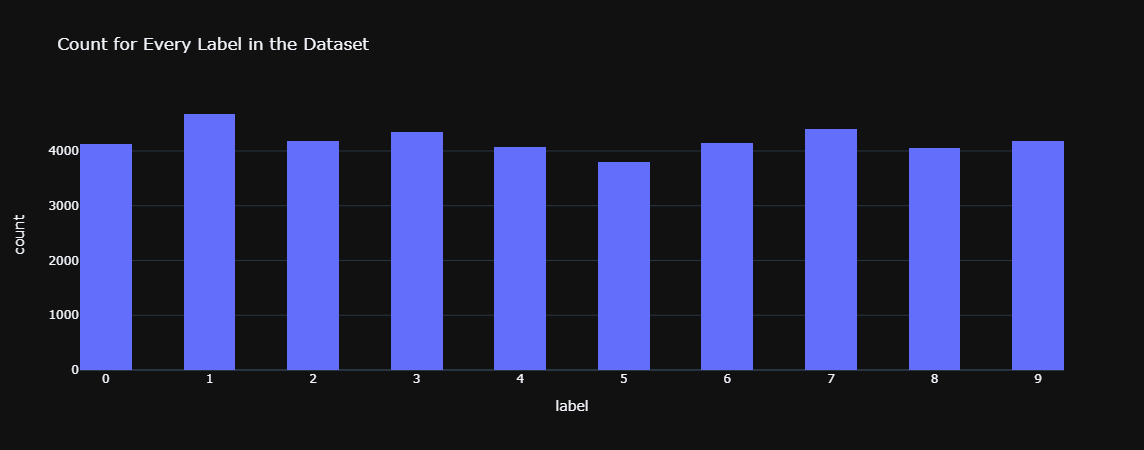

In [36]:
# Visualizing Label counts
fig = px.histogram(train, x = 'label', nbins=20, template = 'plotly_dark',
                  title = 'Count for Every Label in the Dataset')
fig.show()

**Tensorflow** can only get array values as input. Since our data is currently in a csv format, we must convert it into array.

In [37]:
labels = np.array(train.label) # Converting labels into arrays
train.drop(['label'], axis = 1, inplace = True) # Removing labels from dataframe

# Converting images into 28x28 matrix (original proportions)
train = np.array(train).reshape(train.shape[0], 28, 28)
test = np.array(test).reshape(test.shape[0], 28,28)

train = np.array(train).reshape((-1, 28, 28, 1))
test = np.array(test).reshape((-1, 28,28,1))

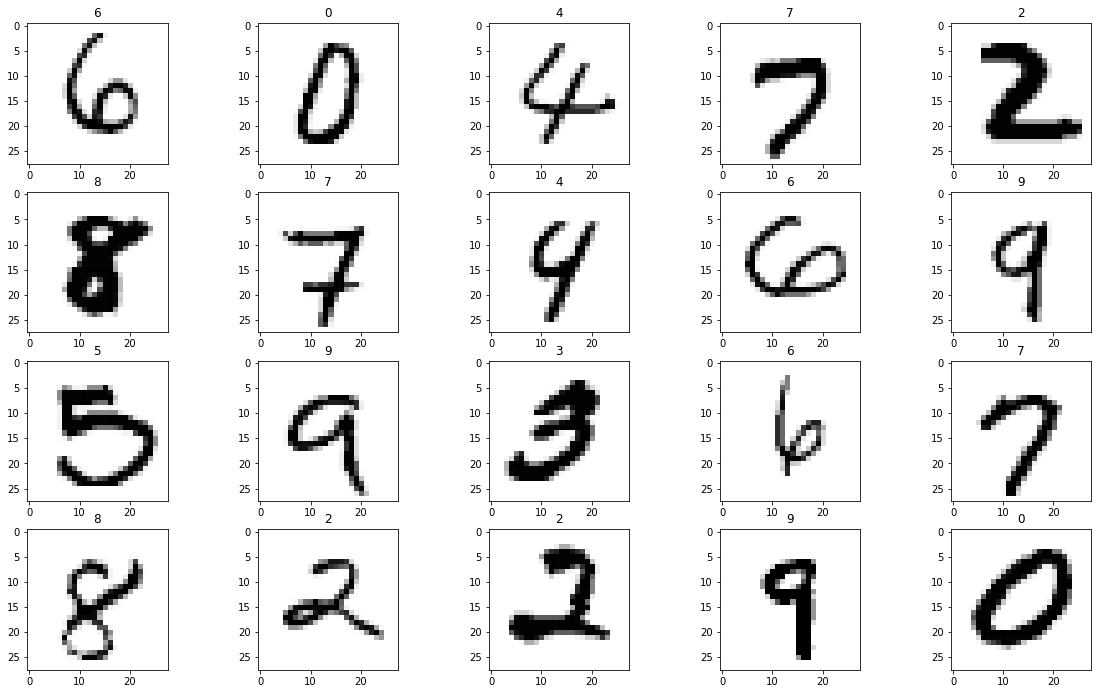

In [40]:
# Visualizing images for labels
plt.figure(figsize=(20,15))
for i in range(20): # Running loop for each digit to be printed
    plt.subplot(5,5,i+1)
    index = np.random.randint(0,42000)
    plt.imshow(train[index], cmap = 'Greys')
    plt.title(labels[index])

<h1 style = "border-bottom: 3px solid black; padding: 8px"><b>3 | Building a Convolutional Neural Network model using TensorFlow</b></h1>

In [49]:
# Creating model

model = Sequential() # Defining a Sequential model, ideal to  connect together a list of layers
# Conv2D layers creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
model.add(Conv2D(filters=64, kernel_size=(5,5), activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu'))

# MaxPool2D layers downsamples the input along its spatial dimensionas (height and width)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size =(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten layers are responsible for flattening input
model.add(Flatten())

# Dense layers receives input from all neurons from previous layer. It's used to classify image based on output from convolutional layers
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'Softmax', name = 'Output_layer'))

# Compiling model and defining the loss function, optimizers and metrics for prediction.
model.compile(loss = 'sparse_categorical_crossentropy', # Defining a loss function
             optimizer = 'adam', # Defining a loss function
             metrics = ['accuracy']) # Defining evaluation metric. Accuracy, as it is the main metric defined on the competition description 

model.summary() # Getting summary of our model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)              

Using Keras' *plot_model*, we can visualize how our neural network is structured.

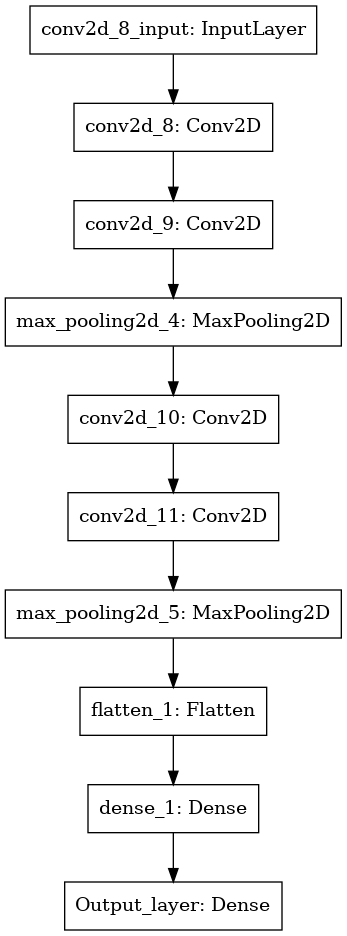

In [50]:
# Visualizing model
tf.keras.utils.plot_model(model)

In [51]:
# Splitting data
train_image, test_image, train_labels, test_labels = train_test_split(train,labels, train_size = 0.75, random_state = 123)

In [52]:
# Training model
history = model.fit(train_image, train_labels, validation_data = (test_image, test_labels), epochs = 20)

2022-08-13 01:31:22.608050: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
985/985 [==============================] - 29s 28ms/step - loss: 0.4672 - accuracy: 0.8760 - val_loss: 0.1106 - val_accuracy: 0.9659
Epoch 2/20
985/985 [==============================] - 29s 29ms/step - loss: 0.1078 - accuracy: 0.9669 - val_loss: 0.0949 - val_accuracy: 0.9687
Epoch 3/20
985/985 [==============================] - 29s 29ms/step - loss: 0.0873 - accuracy: 0.9728 - val_loss: 0.0899 - val_accuracy: 0.9741
Epoch 4/20
985/985 [==============================] - 29s 29ms/step - loss: 0.0702 - accuracy: 0.9784 - val_loss: 0.0732 - val_accuracy: 0.9752
Epoch 5/20
985/985 [==============================] - 29s 29ms/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.0805 - val_accuracy: 0.9774
Epoch 6/20
985/985 [==============================] - 28s 28ms/step - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0596 - val_accuracy: 0.9801
Epoch 7/20
985/985 [==============================] - 29s 29ms/step - loss: 0.0529 - accuracy: 0.9837 - val_loss: 0.0586 - val_accuracy:

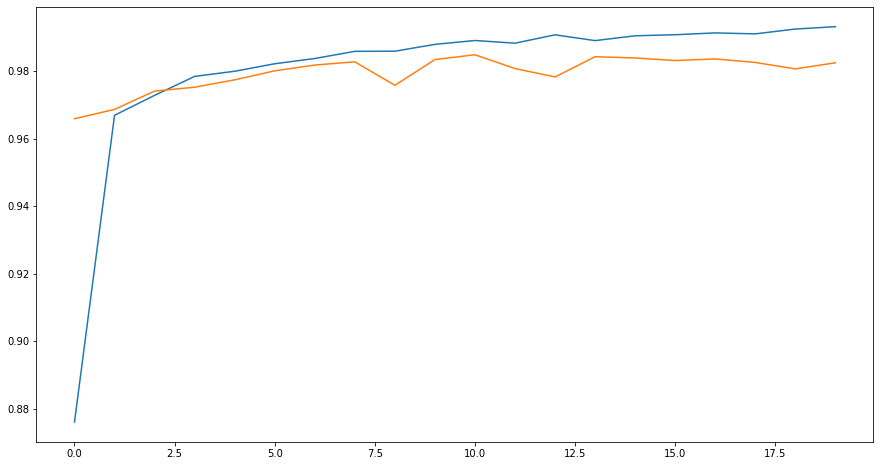

In [53]:
# Plotting Model Accuracy 
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [56]:
# Creating submission file
predictions = model.predict(test)
predictions = tf.math.argmax(predictions, axis = -1)
predictions = pd.Series(predictions, name='Label')
image_id = pd.Series(range(1,28001), name = 'ImageId')
image_id.isnull().sum()
predictions = pd.concat([image_id, predictions], axis = 1)
predictions.to_csv('submission.csv', index=False)

<h1 style = "border-bottom: 3px solid black; padding: 8px"><b>4 | Conclusion</b></h1>

For some reason, I'm having trouble to make submissions attached to the notebook, however, this model achieved an accuracy score of **98.09%** on the test dataset, which is a very good result!<br><br>

For a first attempt at developing a deep learning model, it was really fun participating in this competition.<br>
Feel free to leave comments and suggestions, and if you liked this notebook, leave an upvote! <br><br>

Thank you so much!<br><br><br>

*Luís Fernando Torres*